In [111]:
%matplotlib inline

In [112]:
from clawpack.geoclaw import dtopotools
import numpy as np
import matplotlib.pyplot as pl

In [113]:
# add two subfaults

#subfault0
subfault0 = dtopotools.SubFault()
subfault0.slip = 1.
subfault0.coordinate_specification = 'triangular'
subfault0._corners = [[.6,.5,-1e3],[.5,.6,-1e3],[.6,.6,-3e3]]
subfault0.calculate_geometry_triangles()
subfault0.rake = 90.

In [114]:
subfault1 = dtopotools.SubFault()
subfault1.slip = 1.
subfault1.coordinate_specification = 'triangular'
subfault1._corners = [[.5,.6,-2e3],[.6,.5,-2e3],[.5,.5,-2e3]]
subfault1.calculate_geometry_triangles()

In [115]:
subfault0.strike

-45.001308936797201

In [116]:
subfault0.dip

46.797092636282883

In [117]:
subfault0._get_unit_slip_vector()

array([ 0.484063  ,  0.48408511, -0.72893389])

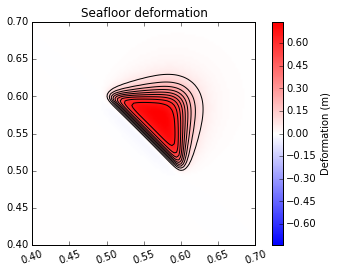

In [118]:
# subfault0.rake = 270.
subfault0.slip = 1.
x = np.linspace(.4,.7,100)
y = np.linspace(.4,.7,100)
dtopo = subfault0.okada(x,y)
dtopo.plot_dZ_colors(0.)

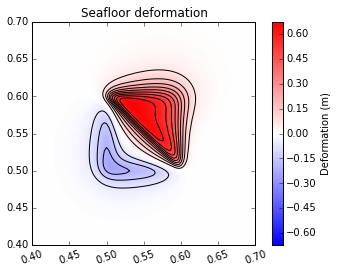

In [119]:
fault = dtopotools.Fault()
subfault0.rake=45.
subfault1.rake=45.

x = np.linspace(.4,.7,100)
y = np.linspace(.4,.7,100)
fault.subfaults = []
fault.subfaults.append(subfault0)
fault.subfaults.append(subfault1)
dtopo = fault.create_dtopography(x,y,times =[0.])
dtopo.plot_dZ_colors(0.)

In [ ]:
subfault0._get_unit_slip_vector()[0]

In [ ]:
dtopo.dZ[0.,:,:].max()

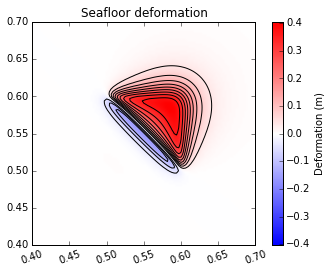

In [ ]:
dtopo.

In [15]:
subfault0.rake

90.0

In [16]:
subfault0._get_leg_angles()

([False, False, True],
 [[0.6, 0.5, -1000.0], [0.5, 0.6, -1000.0], [0.6, 0.5, -1000.0]],
 [[0.5, 0.6, -1000.0], [0.6, 0.6, -3000.0], [0.6, 0.6, -3000.0]],
 [5.4977642985253263, 1.5707963267948966, 6.2830847849876266],
 [1.5707963267948966, 1.3927294884811776, 1.3927390478144897])

In [17]:
subfault0._get_unit_slip_vector()

array([ 0.68524269,  0.685274  , -0.24666171])

In [18]:
subfault0.strike

-45.001308936797201

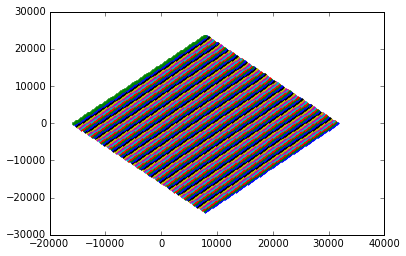

In [19]:
reverse_list,O1_list,O2_list,alpha_list,beta_list = subfault0._get_leg_angles()
xx = np.linspace(.4,.7,100)
X1,X2 = np.meshgrid(xx,xx)
X3= np.ones(X1.shape)*(0.)

alpha = alpha_list[0]
beta = beta_list[0]
Olong = O1_list[0][0]
Olat = O1_list[0][1]
Odepth = - O1_list[0][2]
Y1,Y2,Y3,Z1,Z2,Z3,Yb1,Yb2,Yb3,Zb1,Zb2,Zb3 = \
    subfault0._get_halfspace_coords(X1,X2,X3,alpha,beta,Olong,Olat,Odepth)

import matplotlib.pyplot as pl

pl.plot(Y1,Y2,'.');

In [20]:
reverse_list

[False, False, True]

In [21]:
1/np.sqrt(Yb1**2 + Yb2**2 + Yb3**2)

array([[  4.02084984e-05,   4.07002769e-05,   4.12026175e-05, ...,
          6.54423707e-05,   6.44635095e-05,   6.34982415e-05],
       [  4.04502669e-05,   4.09510813e-05,   4.14628835e-05, ...,
          6.65005503e-05,   6.54741804e-05,   6.44635095e-05],
       [  4.06888077e-05,   4.11986471e-05,   4.17199068e-05, ...,
          6.75767528e-05,   6.65005503e-05,   6.54423707e-05],
       ..., 
       [  3.22821716e-05,   3.25350248e-05,   3.27899152e-05, ...,
          4.17199068e-05,   4.14628835e-05,   4.12026175e-05],
       [  3.20388528e-05,   3.22859878e-05,   3.25350248e-05, ...,
          4.11986471e-05,   4.09510813e-05,   4.07002769e-05],
       [  3.17973075e-05,   3.20388528e-05,   3.22821716e-05, ...,
          4.06888077e-05,   4.04502669e-05,   4.02084984e-05]])

In [15]:
v11 = np.zeros(X1.shape)
v21 = np.zeros(X1.shape)
v31 = np.zeros(X1.shape)

v12 = np.zeros(X1.shape)
v22 = np.zeros(X1.shape)
v32 = np.zeros(X1.shape)

v13 = np.zeros(X1.shape)
v23 = np.zeros(X1.shape)
v33 = np.zeros(X1.shape)

for j in range(3):
    alpha = alpha_list[j]
    beta = beta_list[j]
    
    Olong = O1_list[j][0]
    Olat = O1_list[j][1]
    Odepth = -O1_list[j][2]
    
    if reverse_list[j]:
        sgn = -1.
    else:
        sgn = 1.
    
    Y1,Y2,Y3,Z1,Z2,Z3,Yb1,Yb2,Yb3,Zb1,Zb2,Zb3 = \
        subfault0._get_halfspace_coords(X1,X2,X3,alpha,beta,Olong,Olat,Odepth)

    w11,w12,w13,w21,w22,w23,w31,w32,w33 = \
                            subfault0._get_angular_dislocations(Y1,Y2,Y3,Z1,Z2,Z3,\
                                  Yb1,Yb2,Yb3,Zb1,Zb2,Zb3,beta,Odepth)
        
#     w11,w12,w13,w21,w22,w23,w31,w32,w33 = \
#     subfault0._get_angular_dislocations_surface(Y1,Y2,Y3,beta,Odepth)
    
    w11,w12,w13,w21,w22,w23,w31,w32,w33 = \
                subfault0._coord_transform(w11,w12,w13,w21,w22,w23,w31,w32,w33,alpha)
    
    
    v11 = v11 + sgn*w11
    v21 = v21 + sgn*w21
    v31 = v31 + sgn*w31
    v12 = v12 + sgn*w12
    v22 = v22 + sgn*w22
    v32 = v32 + sgn*w32
    v13 = v13 + sgn*w13
    v23 = v23 + sgn*w23
    v33 = v33 + sgn*w33
    
    Olong = O2_list[j][0]
    Olat = O2_list[j][1]
    Odepth = -O2_list[j][2]
    
    Y1,Y2,Y3,Z1,Z2,Z3,Yb1,Yb2,Yb3,Zb1,Zb2,Zb3 = \
        subfault0._get_halfspace_coords(X1,X2,X3,alpha,beta,Olong,Olat,Odepth)

    w11,w12,w13,w21,w22,w23,w31,w32,w33 =subfault0._get_angular_dislocations(Y1,Y2,Y3,Z1,Z2,Z3,\
                                  Yb1,Yb2,Yb3,Zb1,Zb2,Zb3,beta,Odepth)


#     w11,w12,w13,w21,w22,w23,w31,w32,w33 = \
#     subfault0._get_angular_dislocations_surface(Y1,Y2,Y3,beta,Odepth)

    w11,w12,w13,w21,w22,w23,w31,w32,w33 = \
                subfault0._coord_transform(w11,w12,w13,w21,w22,w23,w31,w32,w33,alpha)
        
    
    v11 = v11 - sgn*w11
    v21 = v21 - sgn*w21
    v31 = v31 - sgn*w31
    v12 = v12 - sgn*w12
    v22 = v22 - sgn*w22
    v32 = v32 - sgn*w32
    v13 = v13 - sgn*w13
    v23 = v23 - sgn*w23
    v33 = v33 - sgn*w33        

        
#     v11 = v11 - sgn*w13
#     v21 = v21 - sgn*w23
#     v31 = v31 - sgn*w33
#     v12 = v12 - sgn*w13
#     v22 = v22 - sgn*w23
#     v32 = v32 - sgn*w33
#     v13 = v13 - sgn*w13
#     v23 = v23 - sgn*w23
#     v33 = v33 - sgn*w33

    

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


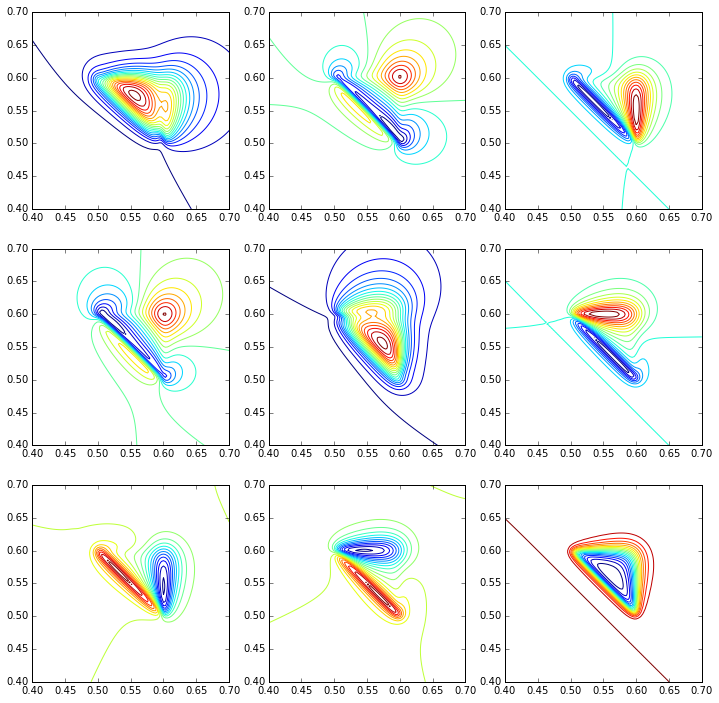

In [16]:
f,ax = pl.subplots(nrows=3,ncols=3,figsize=(12,12))
ax[0][0].contour(X1,X2,v11,20);
ax[0][1].contour(X1,X2,v12,20);
ax[0][2].contour(X1,X2,-v13,20);
ax[1][0].contour(X1,X2,v21,20);
ax[1][1].contour(X1,X2,v22,20);
ax[1][2].contour(X1,X2,-v23,20);
ax[2][0].contour(X1,X2,v31,20);
ax[2][1].contour(X1,X2,v32,20);
ax[2][2].contour(X1,X2,-v33,20);

f.savefig('dislocations_triangular.png',dpi=150)
# pl.colorbar();
pl.axis('equal');


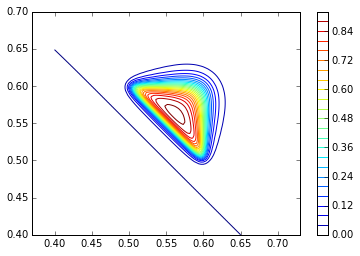

In [67]:
pl.contour(X1,X2,1.*v33+ 0.*v22 + 0.*v31,30);
pl.colorbar();
pl.axis('equal');

In [21]:
v13

array([[ 90.78164726,  92.20018461,  93.64149024, ...,  53.60772321,
         53.08446621,  52.57292769],
       [ 89.31967815,  90.76351416,  92.23337366, ...,  52.29286206,
         51.78081587,  51.28041688],
       [ 87.7786771 ,  89.2462287 ,  90.74323707, ...,  50.95846246,
         50.45827618,  49.96963964],
       ..., 
       [-93.68987499, -94.2138892 , -94.72629428, ..., -68.90683166,
        -68.33015163, -67.75773652],
       [-93.90241454, -94.41452019, -94.91510109, ..., -69.48069339,
        -68.90814199, -68.33965011],
       [-94.10723544, -94.60779721, -95.0969247 , ..., -70.04223349,
        -69.47389615, -68.90941727]])

In [34]:
np.meshgrid?

In [35]:
subfault0.corners

[[0.1, 0.0, -10000.0], [0.0, 0.1, -20000.0], [0.1, 0.1, -10000.0]]

In [36]:
from numpy import pi

# subfault0._get_halfspace_coords?
X1 = np.array([0.])
X2 = np.array([0.])
X3 = np.array([0.])

Olong = subfault0.corners[0][0]
Olat = subfault0.corners[0][1]
Odepth = subfault0.corners[0][2]

Y1,Y2,Y3,Z1,Z2,Z3,Yb1,Yb2,Yb3,Zb1,Zb2,Zb3 = \
    subfault0._get_halfspace_coords(X1,X2,X3,np.pi/2.,np.pi/3,Olong,Olat,Odepth)

In [37]:
import numpy as np

xx = np.linspace(0,1,10)

In [38]:
1/xx

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


array([        inf,  9.        ,  4.5       ,  3.        ,  2.25      ,
        1.8       ,  1.5       ,  1.28571429,  1.125     ,  1.        ])

In [39]:
0.5**2 + 0.8660254**2

0.9999999934451599

In [40]:
# choose number of Gaussian quadrature points
subfault0.n_gauss_pts = 20
subfault1.n_gauss_pts = 40

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/usr/local/lib/python2.7/site-packages/matplotlib/axes/_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


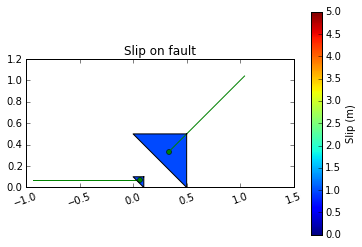

In [41]:
fault0 = dtopotools.Fault(subfaults=[subfault0,subfault1])

fault0.plot_subfaults(slip_color=True,plot_rake=True,cmin_slip=0.,cmax_slip=5.)

In [42]:
print fault0.Mw()
print subfault0.length * subfault0.width * (dtopotools.LAT2METER)**2

7.17570547677
1.02601764163e+18


In [43]:
subfault0.rake * dtopotools.DEG2RAD / np.pi

1.0

In [44]:
# generate dtopo
x,y = fault0.create_dtopo_xy(buffer_size=0.1)
dtopo = fault0.create_dtopography(x,y,times=[0.])

# plot deformation dZ at time 0.
dtopo.plot_dZ_colors(0.)

NameError: global name 'alpha' is not defined

In [ ]:
import numpy as np

In [ ]:
x = np.linspace(-1.,1.,200)
y = np.linspace(-1.,1.,200)

Dtopo = subfault0.okada(x,y)

In [ ]:
print subfault0.dtopo.dZ[0,:,:].shape
print subfault0.slip
print subfault0.dip

In [ ]:
dtopotools.LAT2METER

In [ ]:
import matplotlib.pyplot as pl

# pl.pcolor(Dtopo.X,Dtopo.Y,Dtopo.dZ[0,:,:])
# pl.colorbar()

Dtopo.plot_dZ_colors(0.)

In [ ]:
x,w = subfault0.gauss_pts

In [ ]:
np.array?

In [ ]:
slab_pts = np.loadtxt('cas_slab1.0_clip.xyz')

In [ ]:
from scipy.spatial import Delaunay

tri = Delaunay(slab_pts[:,0:2])


In [ ]:
I = np.invert(np.isnan(slab_pts[:,2]))
c4e = []
for j in range(tri.nsimplex):
    node_list = tri.simplices[j,:].tolist()
    if I[node_list[0]] and I[node_list[1]] and I[node_list[2]] :
        c1 = slab_pts[node_list[0],:].tolist()
        c2 = slab_pts[node_list[1],:].tolist()
        c3 = slab_pts[node_list[2],:].tolist()
        if (c2[1] > 49.7) and (c2[0] > -125.):
            c4e.append([c1,c2,c3])

In [ ]:
import copy

subfaults = []



# j = 20

# subfault0 = dtopotools.SubFault()
# subfault0.coordinate_specification = 'triangular'
# subfault0.slip = 5.
# subfault0._corners = c4e[j]
# subfault0.calculate_geometry_triangles()
# subfaults.append(copy.copy(subfault0))

# N = min([100,len(c4e)])
N = len(c4e)
for j in range(N):
    subfault0 = dtopotools.SubFault()
    subfault0.coordinate_specification = 'triangular'
    subfault0.slip = 5.
    subfault0._corners = c4e[j]
    subfault0.calculate_geometry_triangles()
    subfaults.append(copy.copy(subfault0))


In [ ]:
fault1 = dtopotools.Fault(subfaults=subfaults)

In [ ]:
fault1.containing_rect()

In [ ]:
import matplotlib.pyplot as pl

f,ax = pl.subplots(figsize=(20,20))
ax = fault1.plot_subfaults(axes=ax,plot_rake=True,slip_color=False,cmin_slip=0., cmax_slip=5.,verbose=True)